In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
tf.random.set_seed(42)

In [3]:
from tensorflow.keras.datasets import imdb

In [4]:
vocab_size = 10000  # Limit to the top 10,000 words
max_len = 200  # Maximum sequence length

In [5]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [7]:
print(f"Training samples: {X_train.shape}, Test samples: {X_test.shape}")

Training samples: (25000, 200), Test samples: (25000, 200)


In [9]:
model = Sequential([
    Embedding(vocab_size, 32, input_length=max_len),
    SimpleRNN(32, return_sequences=False),
    Dense(1, activation='sigmoid')
])


In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [11]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 76ms/step - accuracy: 0.5693 - loss: 0.6682 - val_accuracy: 0.7854 - val_loss: 0.4614
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 73ms/step - accuracy: 0.8421 - loss: 0.3693 - val_accuracy: 0.8276 - val_loss: 0.3940
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.9028 - loss: 0.2406 - val_accuracy: 0.8220 - val_loss: 0.4553
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - accuracy: 0.9238 - loss: 0.1964 - val_accuracy: 0.7896 - val_loss: 0.4887
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 67ms/step - accuracy: 0.9633 - loss: 0.1166 - val_accuracy: 0.8168 - val_loss: 0.5131


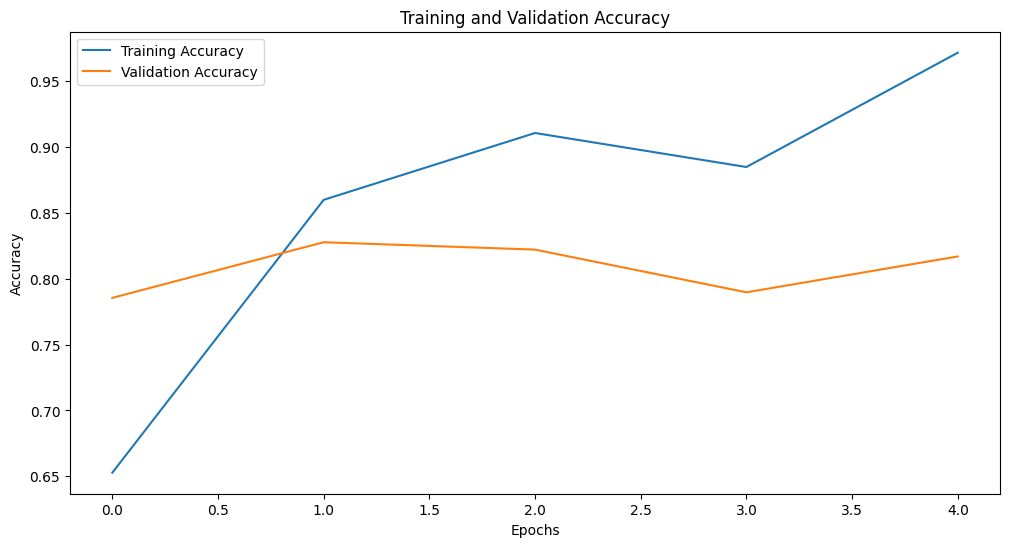

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8112 - loss: 0.5277
Test Accuracy: 0.81
